<a href="https://colab.research.google.com/github/ubsuny/PHY386/blob/Homework2025/2025/HW/Zman42/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Extending the Code

In [1]:
# Import Libraries
import numpy as np
import scipy.linalg as la

In [2]:
def setup_mass_matrix(m_list):
  """
  This function creates you mass matrix using the provided mass list for the diagional terms.
  Arguments:
  m_list -- list of masses

  Returns:
  M -- mass matrix
  """
  M = np.diag(m_list)
  return M

In [3]:
M = setup_mass_matrix([1, 1, 1])
M

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [30]:
def setup_stiffness_matrix(k_list, walls=True):
  """
  This function creates you stiffness matrix using the provided spring constant list for the diagional terms

  Arguments:
  k_list -- list of spring constants
  walls -- boolean indicating if the first and last springs are connected to walls

  Returns:
  K -- stiffness matrix
  """

  K = np.zeros((len(k_list)-1, len(k_list)-1))
  if walls:

    for i in range(len(k_list)-1):
      K[i,i] = k_list[i] + k_list[i+1] # Diagonal Elements
      if i < len(k_list)-2:
        K[i, i+1] = -k_list[i+1] # Upper Off-Diagonal Elements
        K[i+1, i] = -k_list[i+1] # Lower Off-Diagonal Elements

  else:
    for i in range(len(k_list)-1):
            if i == 0:  # First mass (not attached to a wall)
                K[i, i] = k_list[i+1]
            elif i == len(k_list) - 2:  # Last mass (not attached to a wall)
                K[i, i] = k_list[i]
            else:  # Internal masses
                K[i, i] = k_list[i] + k_list[i+1]

            if i < len(k_list) - 2:
                K[i, i+1] = -k_list[i+1]  # Upper off-diagonal
                K[i+1, i] = -k_list[i+1]  # Lower off-diagonal

  return K

In [31]:
K = setup_stiffness_matrix([10, 15, 15, 10])
K

array([[ 25., -15.,   0.],
       [-15.,  30., -15.],
       [  0., -15.,  25.]])

In [32]:
def calculate_eigenfrequencies(K, M):
  """
  We want a function to solve the eigenfrequencies for a spring-mass system

  Arguments:
  K_matrix -- stiffness matrix
  M_matrix -- mass matrix

  Returns:
  eigenvalues -- list of eigenfrequencies
  """
  omega = np.sqrt(la.eigh(K, M)[0])
  return omega

In [33]:
print(calculate_eigenfrequencies(K, M))

[2.47790045 5.         6.98999352]


## AI Creativity

Eigenfrequencies (rad/s): [2.15611669 1.84352636 1.36132151 0.35414216 0.77649842]


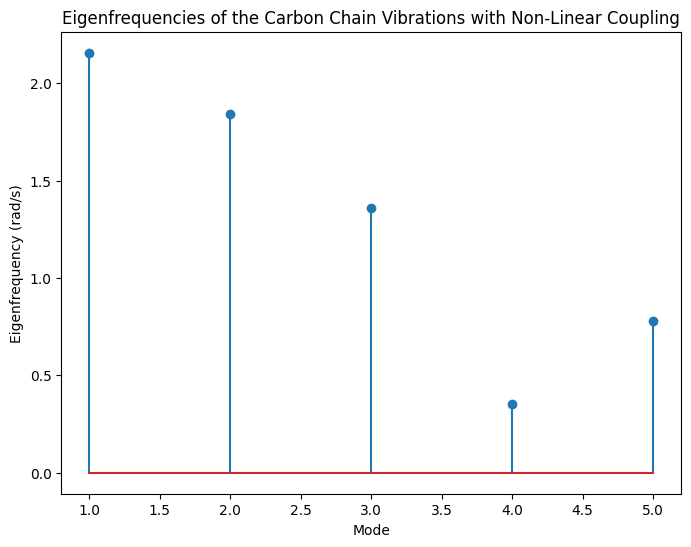

In [ ]:
import numpy as np
from scipy.linalg import eig
import matplotlib.pyplot as plt

# System parameters
n = 5  # Number of carbon atoms in the chain
m = 12.0  # Mass of each carbon atom (approx. atomic mass)
k = 15.0  # Linear spring constant for carbon-carbon bond
c = 0.3  # Damping coefficient
k_nl = 5.0  # Non-linear spring constant for cubic term

# Mass matrix
M = np.eye(n) * m

# Spring, damping, and non-linear spring force matrices
K = np.zeros((n, n))
C = np.zeros((n, n))

# Non-linear spring force function
def non_linear_spring_force(x):
    return k * x + k_nl * x**3

# Setting up the linear spring and damping matrices
for i in range(n - 1):
    K[i, i] += k
    K[i, i + 1] -= k
    K[i + 1, i] -= k
    K[i + 1, i + 1] += k

    C[i, i] += c
    C[i, i + 1] -= c
    C[i + 1, i] -= c
    C[i + 1, i + 1] += c

# Non-linear force matrix
# For simplicity, we'll consider small displacements and use a linear approximation
F_nl = np.zeros((n, n))
for i in range(n):
    F_nl[i, i] = non_linear_spring_force(0.1)  # Small displacement approximation

# System matrix (M^-1 * (K + iC + F_nl))
A = np.linalg.inv(M).dot(K + 1j * C + F_nl)

# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = eig(A)

# Eigenfrequencies
eigenfrequencies = np.sqrt(np.abs(eigenvalues))
print("Eigenfrequencies (rad/s):", eigenfrequencies)

# Plot eigenfrequencies
plt.figure(figsize=(8, 6))
plt.stem(np.arange(1, n + 1), eigenfrequencies)
plt.xlabel("Mode")
plt.ylabel("Eigenfrequency (rad/s)")
plt.title("Eigenfrequencies of the Carbon Chain Vibrations with Non-Linear Coupling")
plt.show()


I used Microsoft Copilot. It took me 3 itterations to get it to a real-world example. Mostly I had to tell it to be more creative. In nature you might find this model in carbon-bond molecules like petroleum.